# 1. Project Introduction

# 📊 Obesity Level Prediction — EDA & Machine Learning Model

This notebook performs **Exploratory Data Analysis (EDA)** and builds a **Machine Learning model** to predict obesity levels based on eating habits and physical conditions.

We will:
1. Explore and understand the dataset
2. Perform univariate, bivariate, and multivariate analysis
3. Preprocess the data
4. Train and evaluate ML models
5. Derive insights for health-related interventions


# 2. Data Loading & Overview

## 2.1 Importing Libraries & Dataset

We start by importing essential Python libraries for data manipulation, visualization, and machine learning.

The dataset contains **synthetic and real records** of obesity indicators such as dietary habits, physical activity, and demographic details.

**Goal:** Predict the obesity category (target variable) for each individual.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\40038389\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition (1)\ObesityDataSet_raw_and_data_sinthetic.csv")

In [3]:
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

# 3. Understanding Data

## 3.1 Dataset Structure & Info

We check:
- **Number of rows & columns**
- **Data types** of each column
- **Presence of missing values**
- **Categorical vs Numerical features**

🔍 **Insight:** This helps us decide:
- Which features need encoding
- Which require scaling
- If data imputation is needed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# 4. Feature Separation

## 4.1 Categorical vs Numerical Features

We separate the columns into:
- **Categorical:** Qualitative variables (e.g., gender, family history, smoking habits)
- **Numerical:** Quantitative variables (e.g., height, weight, age)

🎯 **Reason:** Different preprocessing techniques apply to each type.

In [6]:
# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
 
print("\nCategorical Columns:", list(categorical_cols))
print("Numerical Columns:", list(numerical_cols))


Categorical Columns: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Columns: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


# 5. Univariate Analysis

## 5.1 Univariate Analysis — Understanding Single Features

We analyze:
- **Numerical features** — distribution, spread, skewness
- **Categorical features** — frequency counts

📌 **Purpose:** Identify:
- Outliers
- Class imbalance
- Potential data entry errors



Univariate Analysis: Numerical Features

Feature: Age
count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

Feature: Height
count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64

Feature: Weight
count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64

Feature: FCVC
count    2111.000000
mean        2.419043
std         0.533927
min         1.000000
25%         2.000000
50%         2.385502
75%         3.000000
max         3.000000
Name: FCVC, dtype: float64

Feature: NCP
count    2111.000000
mean        2.685628
std         0.778039
min         1.000000
25%         2.6

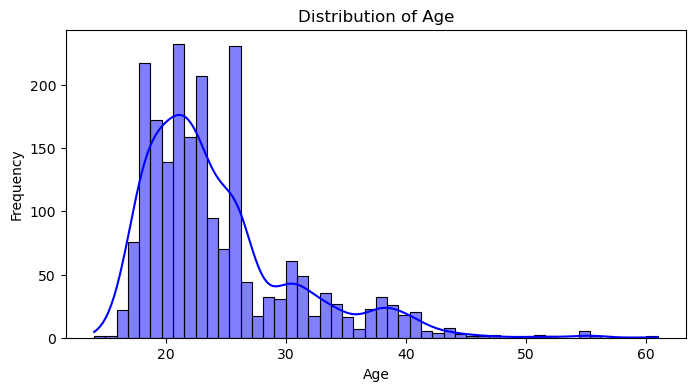

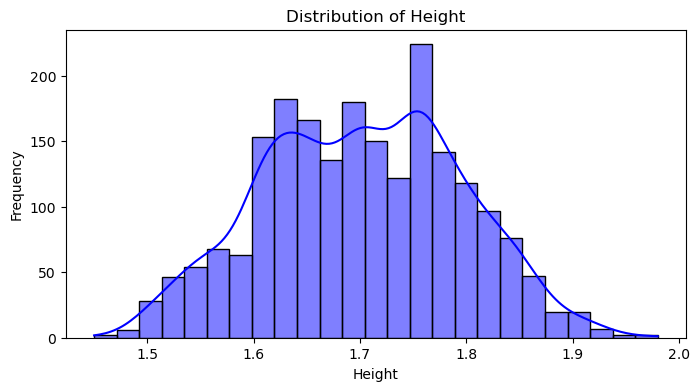

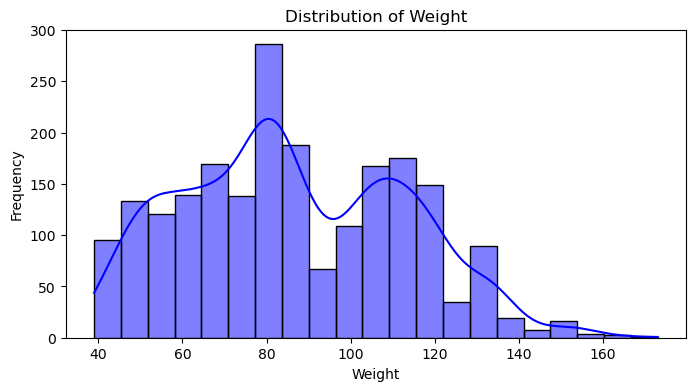

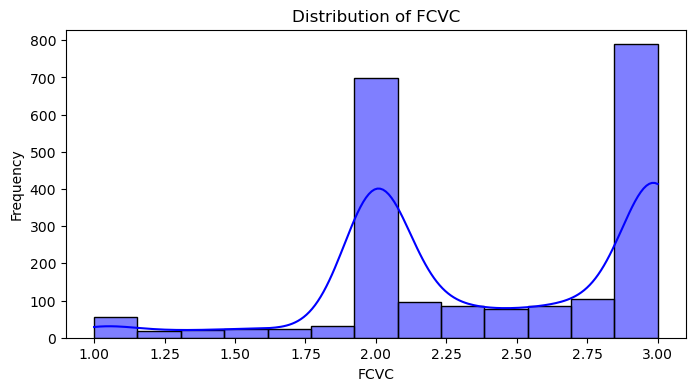

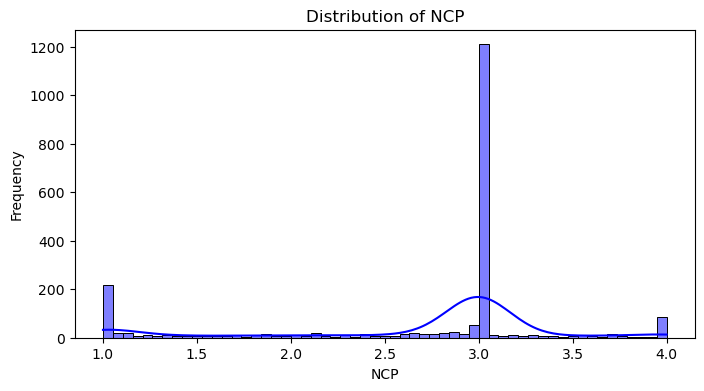

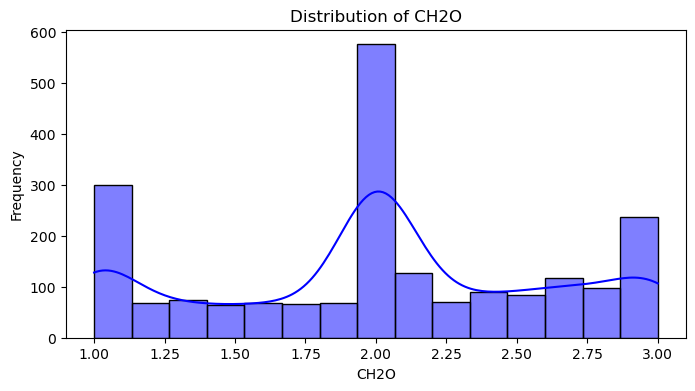

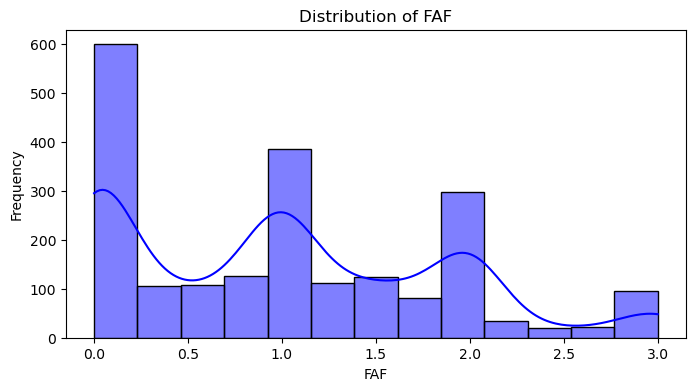

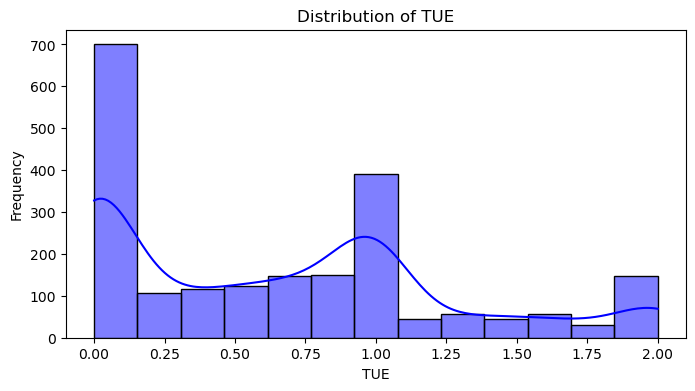


Univariate Analysis: Categorical Features

Feature: Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Feature: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Feature: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

Feature: CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Feature: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Feature: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64

Feature: CALC
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Feature: MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Feature: NObeyesdad
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II

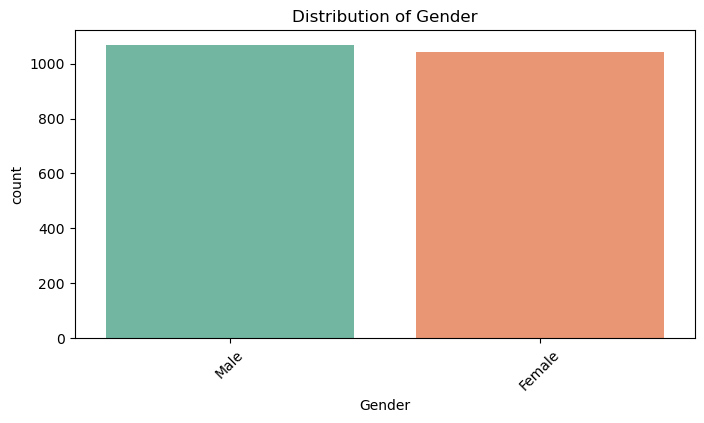

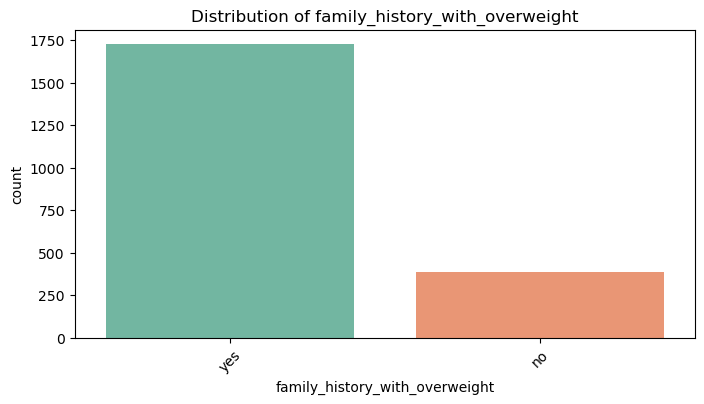

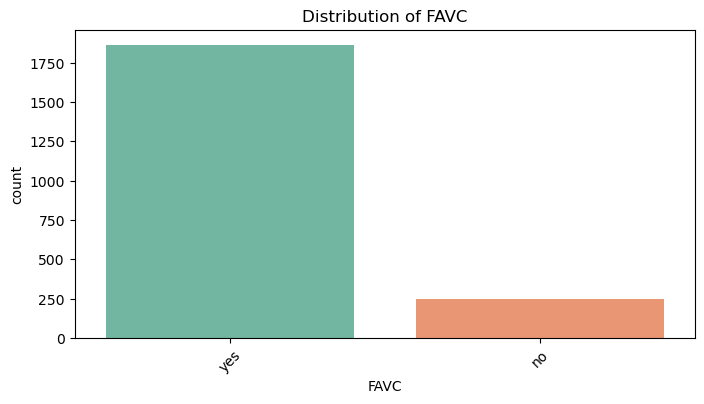

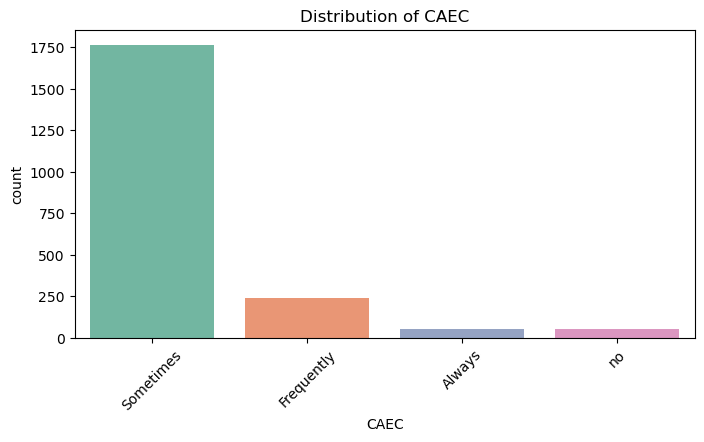

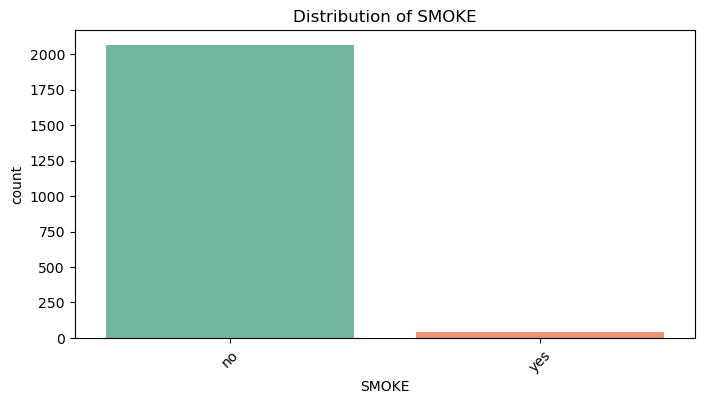

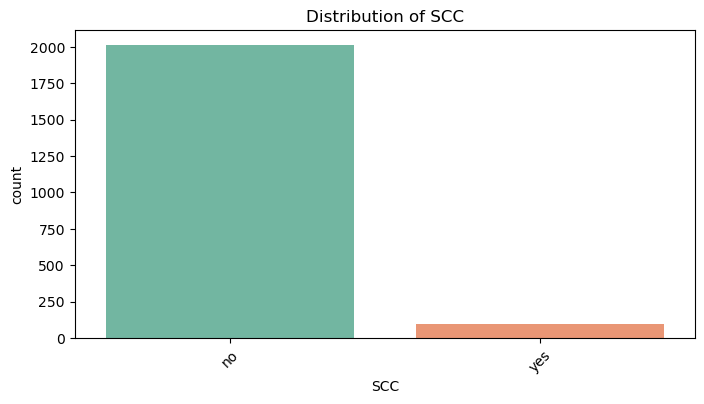

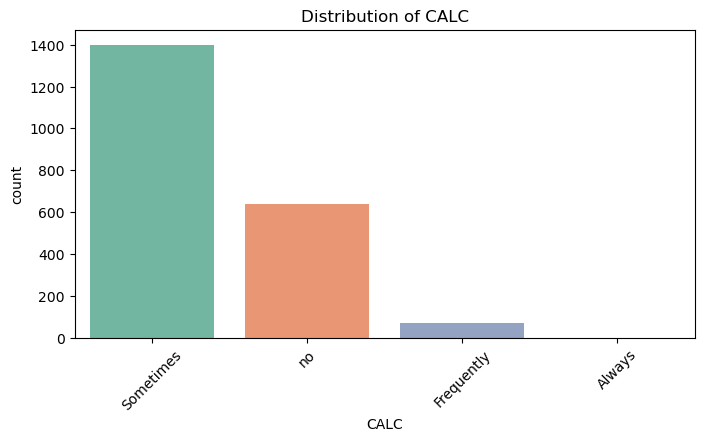

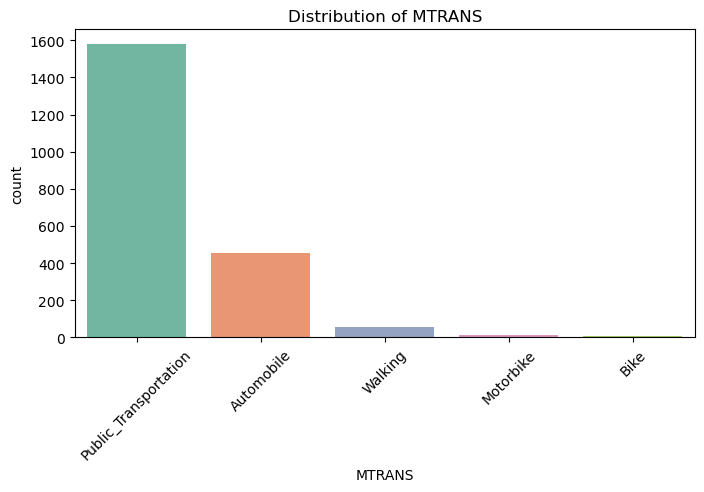

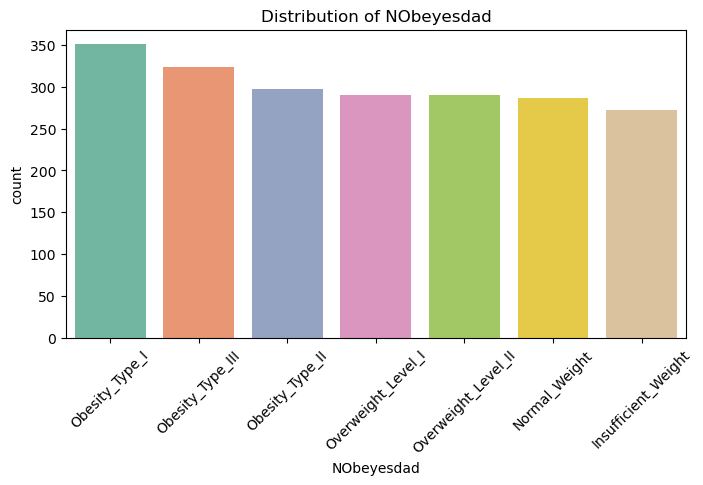

In [7]:
# ================================
# 1. Univariate Analysis
# ================================
 
# Univariate Analysis for Numerical Features
print("\nUnivariate Analysis: Numerical Features")
for col in numerical_cols:
    print(f"\nFeature: {col}")
    print(df[col].describe())
    # Distribution Plot
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.show()
 
# Univariate Analysis for Categorical Features
print("\nUnivariate Analysis: Categorical Features")
for col in categorical_cols:
    print(f"\nFeature: {col}")
    print(df[col].value_counts())
    # Count Plot
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.show()

# 6. Bi-variate Analysis

## 6.1 Numerical Features vs Target

We examine how numerical variables differ across obesity categories.

💡 **Example Insights:**
- Higher BMI correlates with obesity levels
- Sedentary lifestyle variables may show clear separation across classes



Bivariate Analysis: Numerical Features vs Target Variable


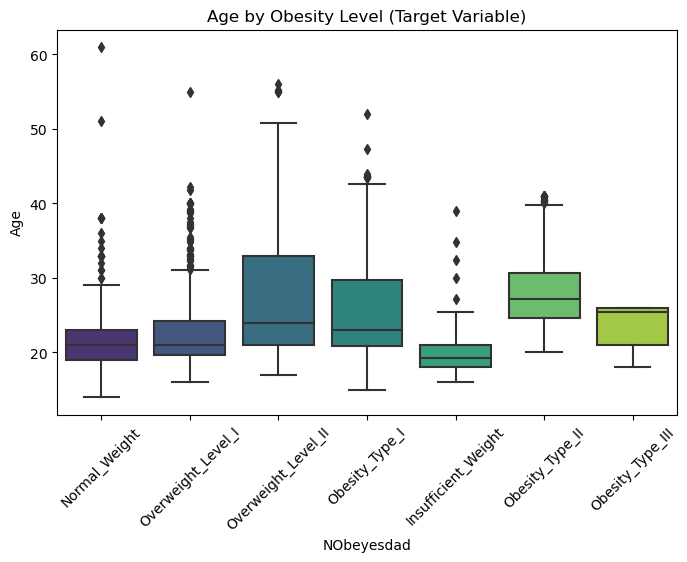

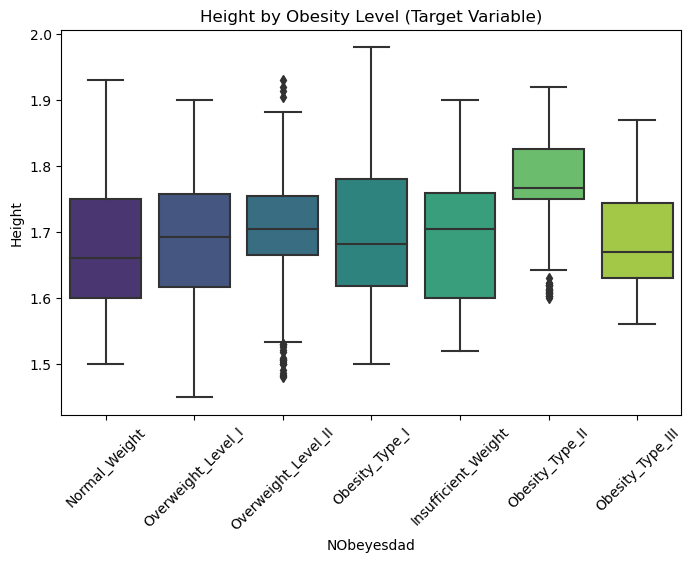

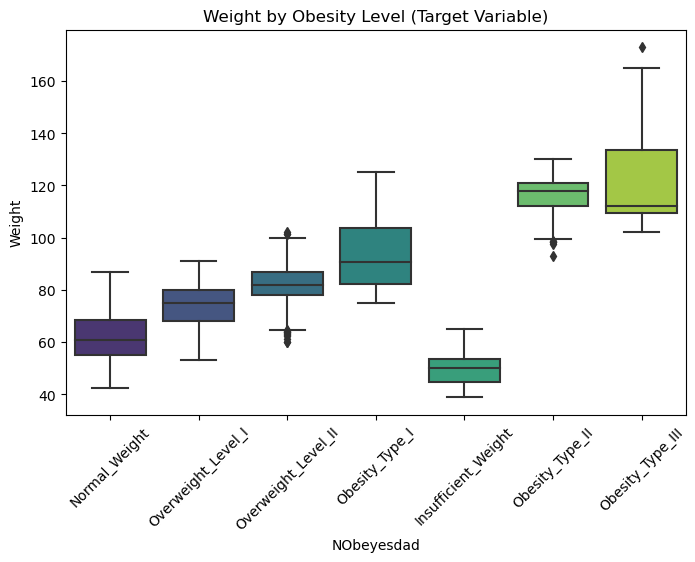

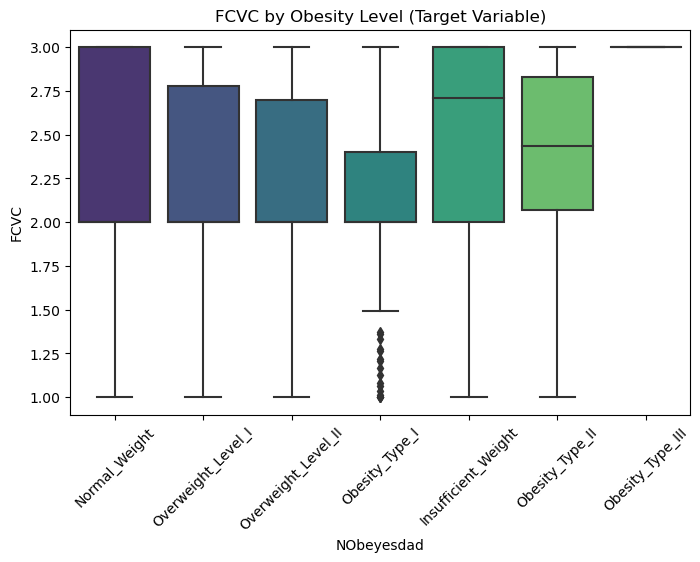

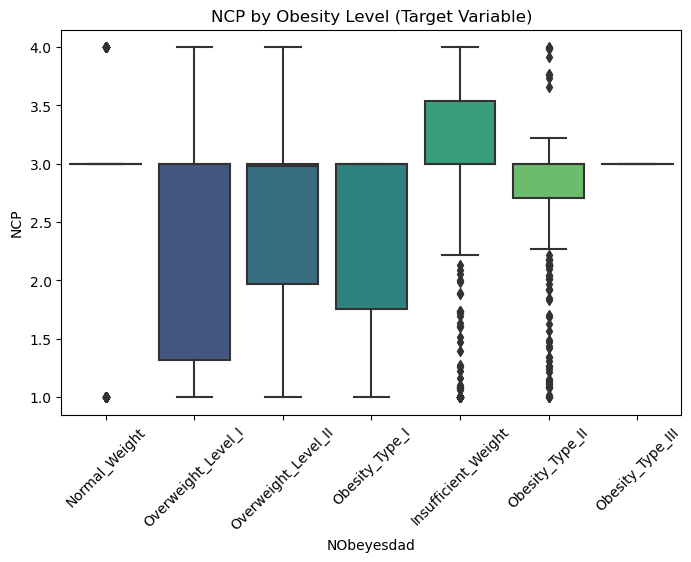

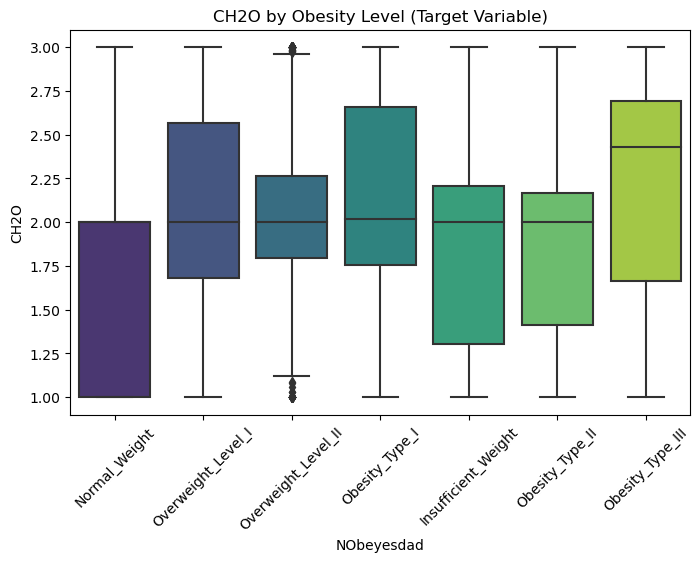

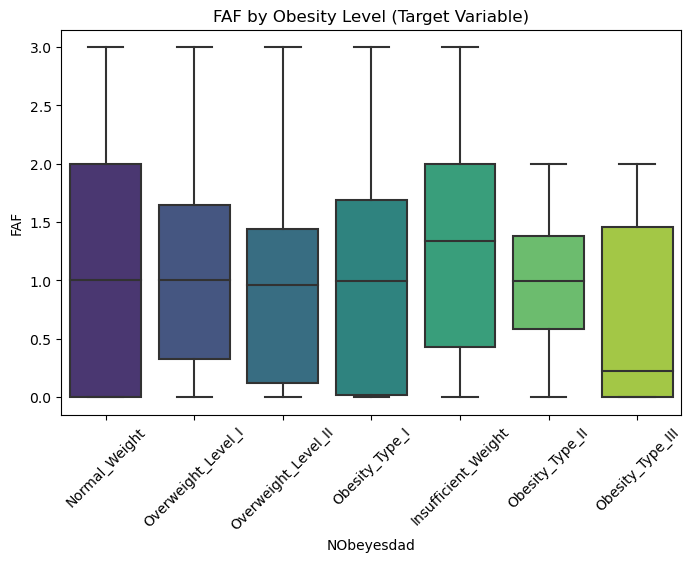

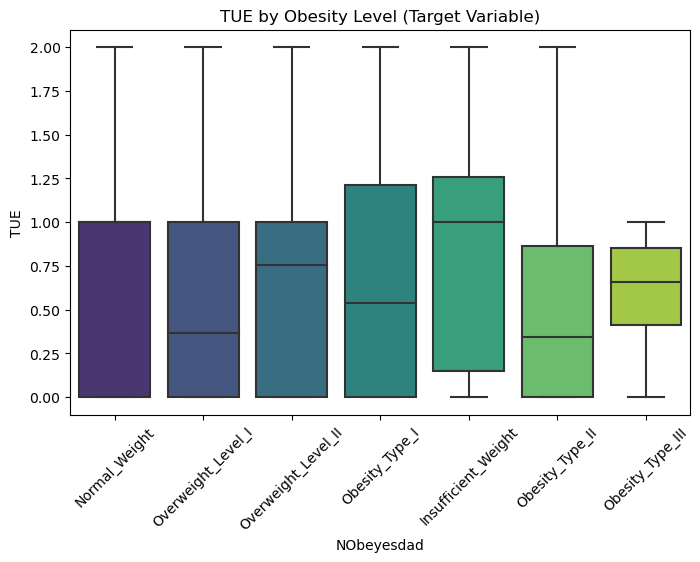


Bivariate Analysis: Categorical Features vs Target Variable


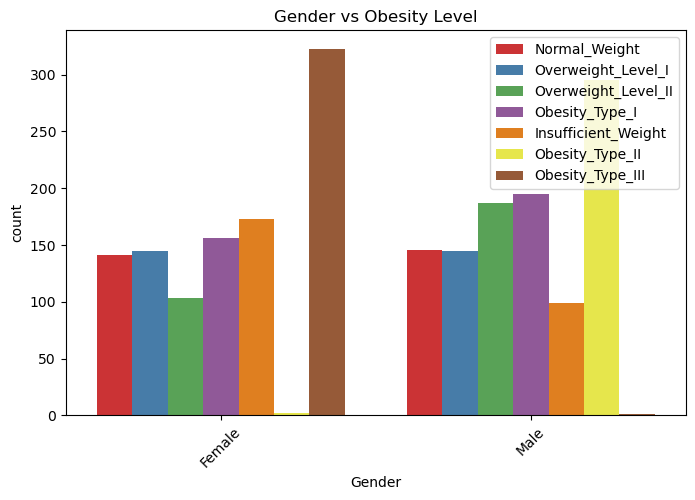

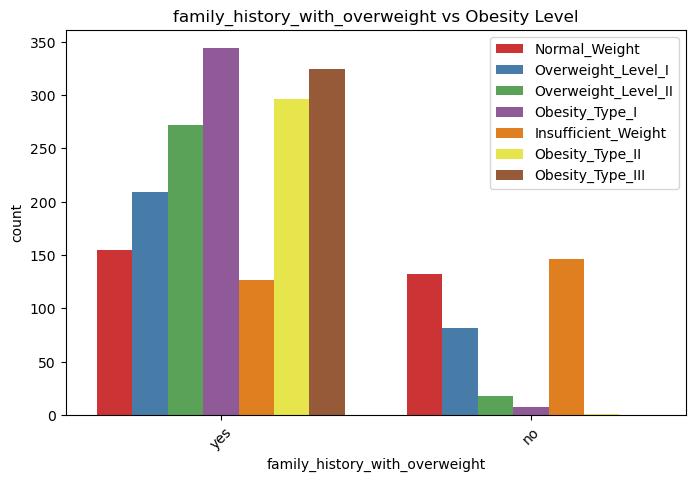

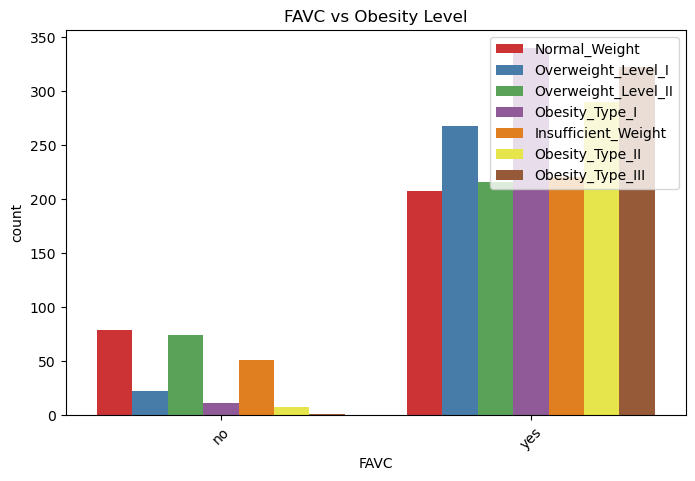

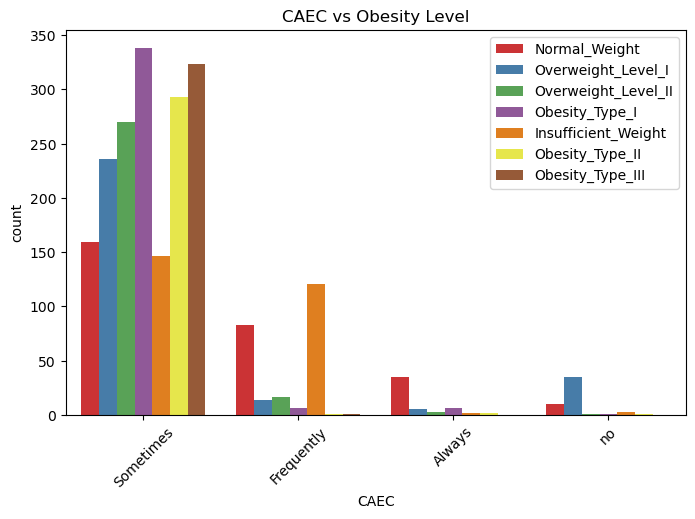

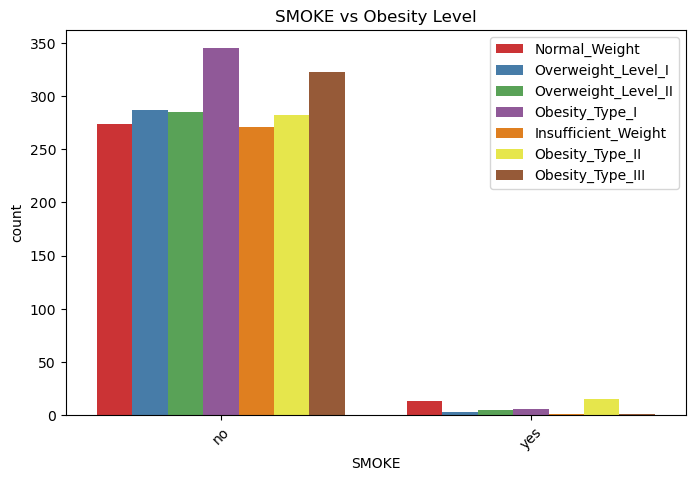

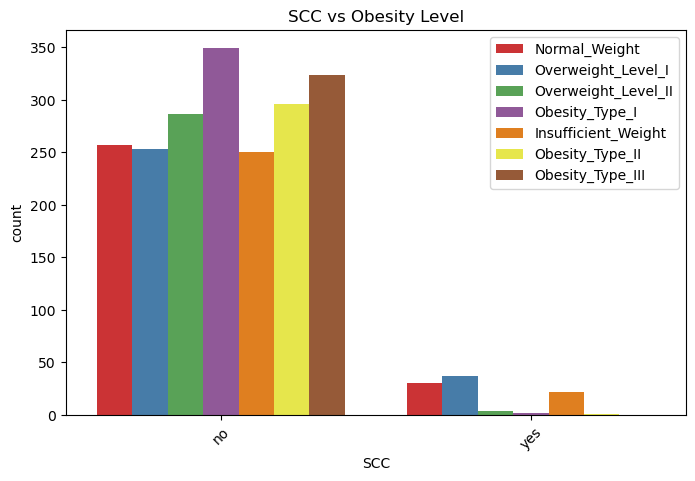

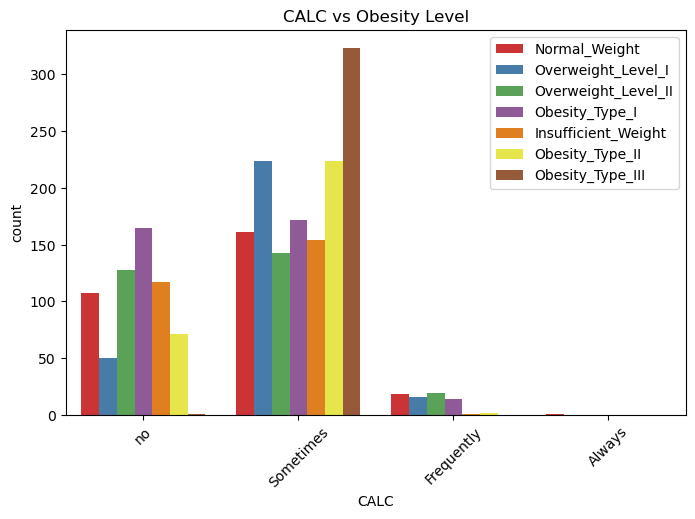

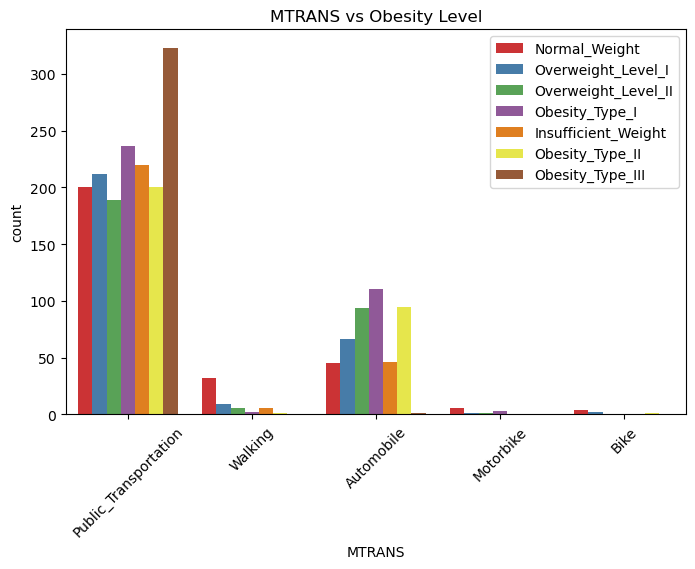

In [8]:
# ================================
# 2. Bivariate Analysis
# ================================
 
# Bivariate Analysis: Numerical Features vs Target Variable
print("\nBivariate Analysis: Numerical Features vs Target Variable")
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='NObeyesdad', y=col, palette='viridis')
    plt.title(f"{col} by Obesity Level (Target Variable)")
    plt.xticks(rotation=45)
plt.show()
 
# Bivariate Analysis: Categorical Features vs Target Variable
print("\nBivariate Analysis: Categorical Features vs Target Variable")
for col in categorical_cols:
    if col != 'NObeyesdad':  # Skip target variable
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=col, hue='NObeyesdad', palette='Set1')
        plt.title(f"{col} vs Obesity Level")
        plt.xticks(rotation=45)
        plt.legend(loc='upper right')
plt.show()

# 7. Multivariate Analysis

## 7.1 Multivariate Relationships

We use **pairplots and heatmaps** to see:
- Correlation patterns between variables
- How groups cluster in multi-feature space

📊 **Key Takeaway:** Helps in feature selection and understanding redundant features.



Multivariate Analysis: Pairplot of Numerical Features


C:\Users\40038389\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


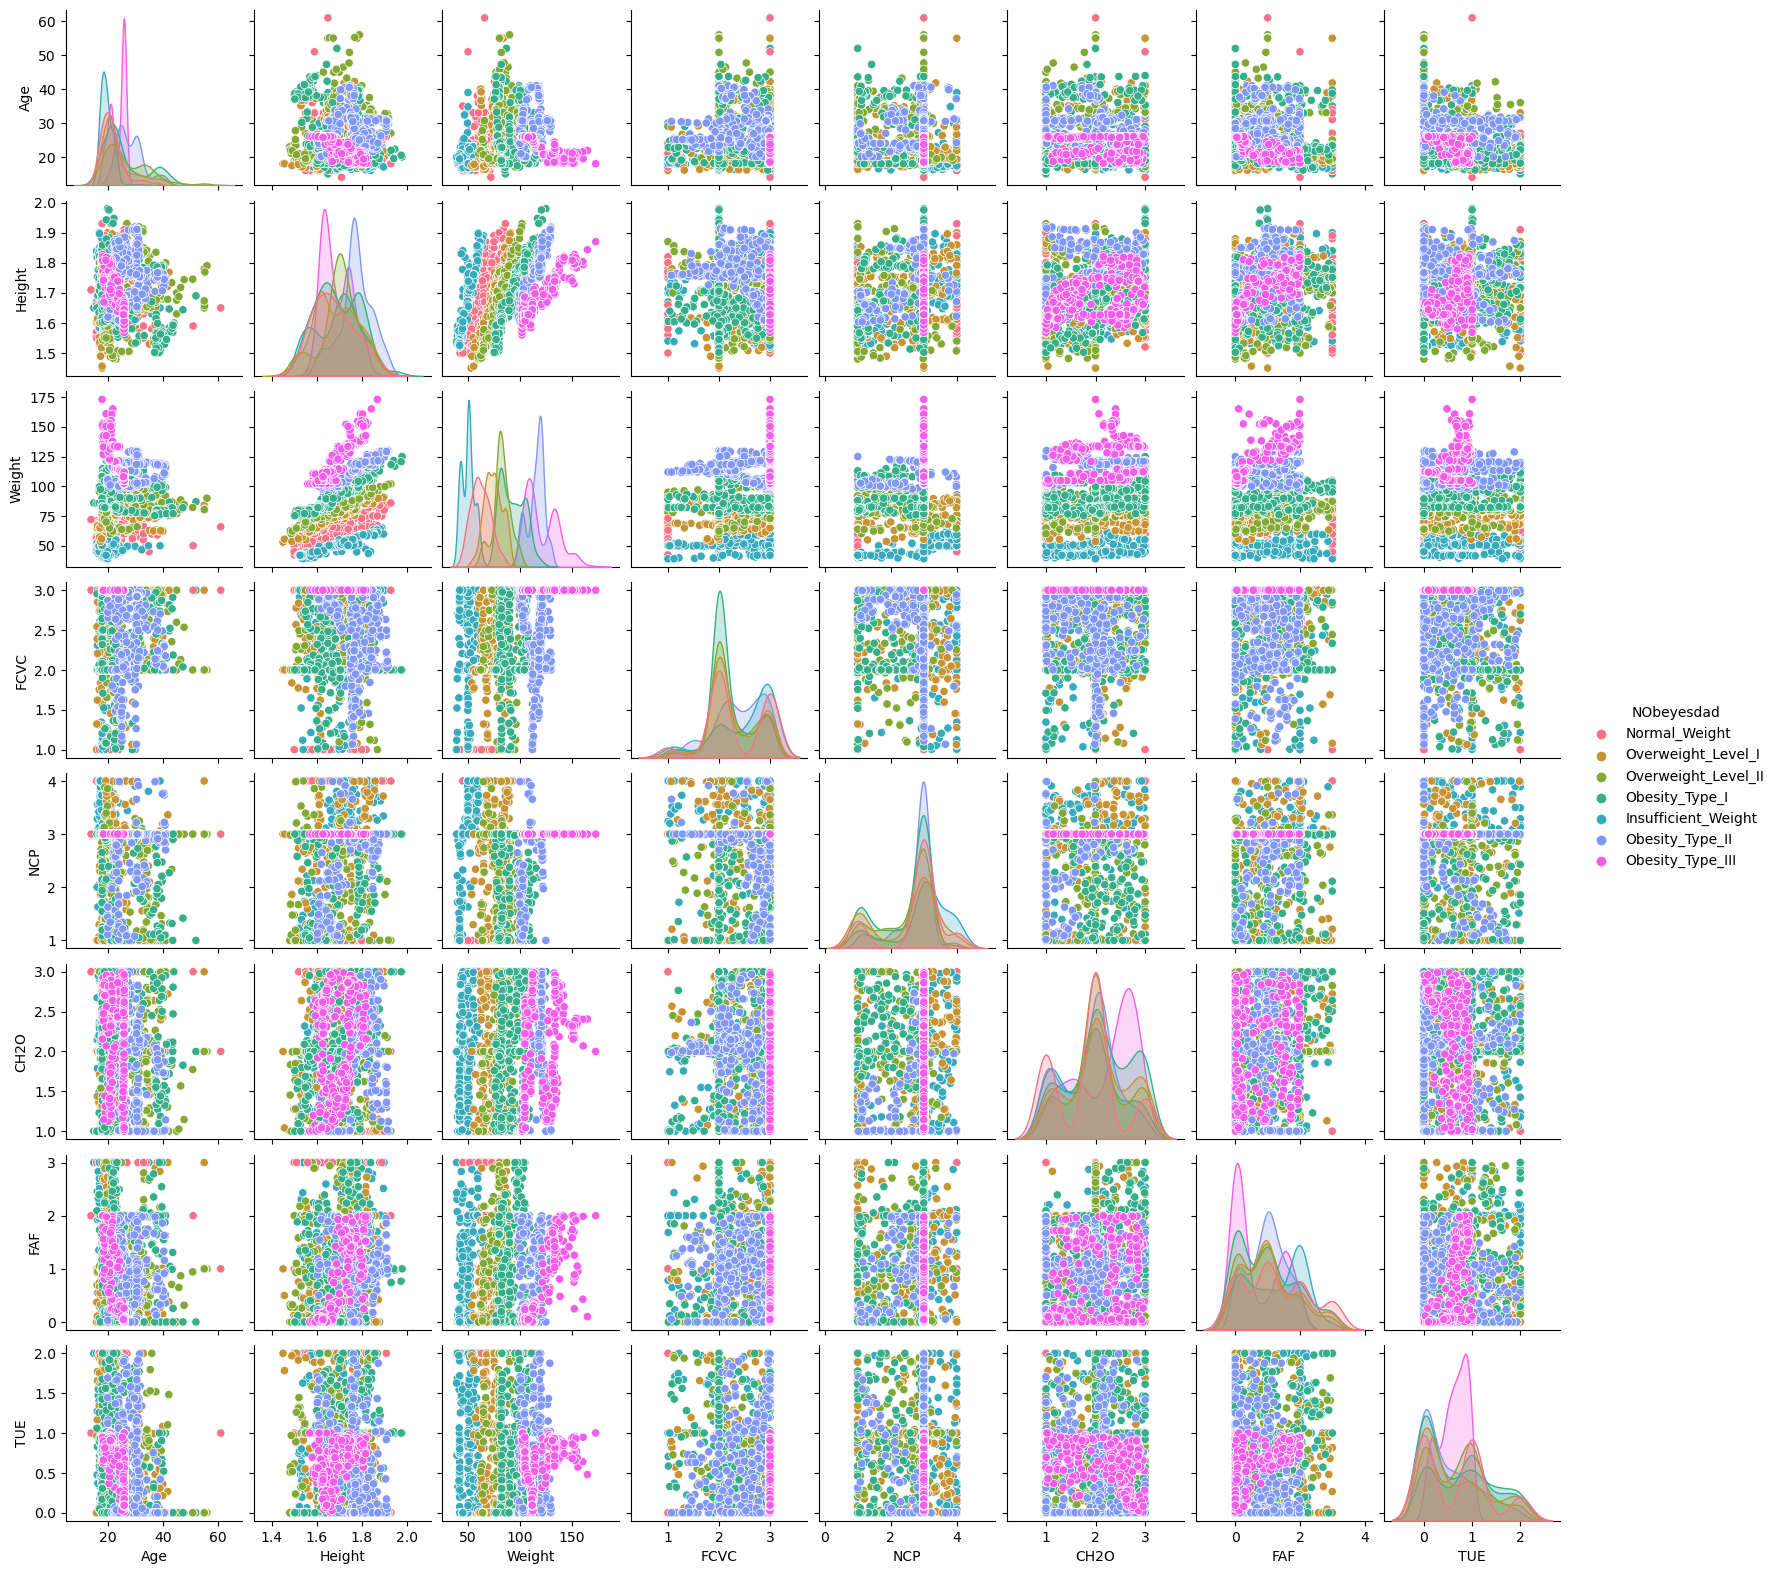


Multivariate Analysis: Correlation Heatmap


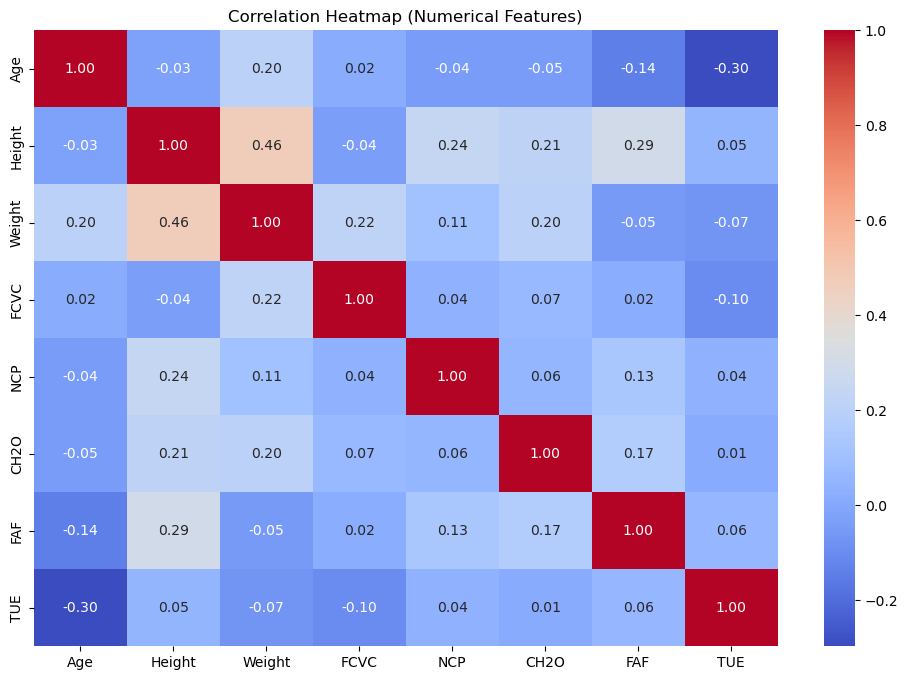


Multivariate Analysis: Cross-tabulation of Categorical Features

Cross-tabulation of Gender with NObeyesdad:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Gender                                                           
Female                      173            141             156   
Male                         99            146             195   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Gender                                                              
Female                    2               323                 145   
Male                    295                 1                 145   

NObeyesdad  Overweight_Level_II  
Gender                           
Female                      103  
Male                        187  

Cross-tabulation of family_history_with_overweight with NObeyesdad:
NObeyesdad                      Insufficient_Weight  Normal_Weight  \
family_history_with_overweight                                       
no 

In [9]:
# ================================
# 3. Multivariate Analysis
# ================================
 
# Multivariate Analysis: Pairplot for Numerical Features
print("\nMultivariate Analysis: Pairplot of Numerical Features")
sns.pairplot(df, vars=numerical_cols, hue='NObeyesdad', palette='husl', diag_kind='kde', height=2)
plt.show()
 
# Multivariate Analysis: Heatmap for Correlation
print("\nMultivariate Analysis: Correlation Heatmap")
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()
 
# Multivariate Analysis: Interaction Between Categorical Features
print("\nMultivariate Analysis: Cross-tabulation of Categorical Features")
for col in categorical_cols:
    if col != 'NObeyesdad':
        print(f"\nCross-tabulation of {col} with NObeyesdad:")
        print(pd.crosstab(df[col], df['NObeyesdad']))

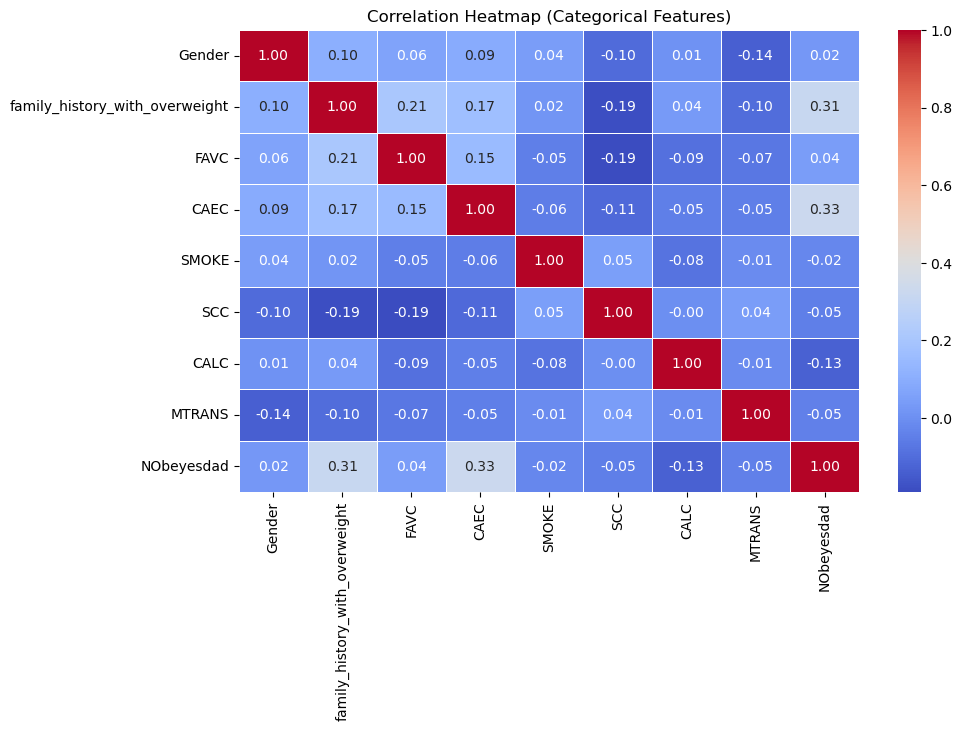

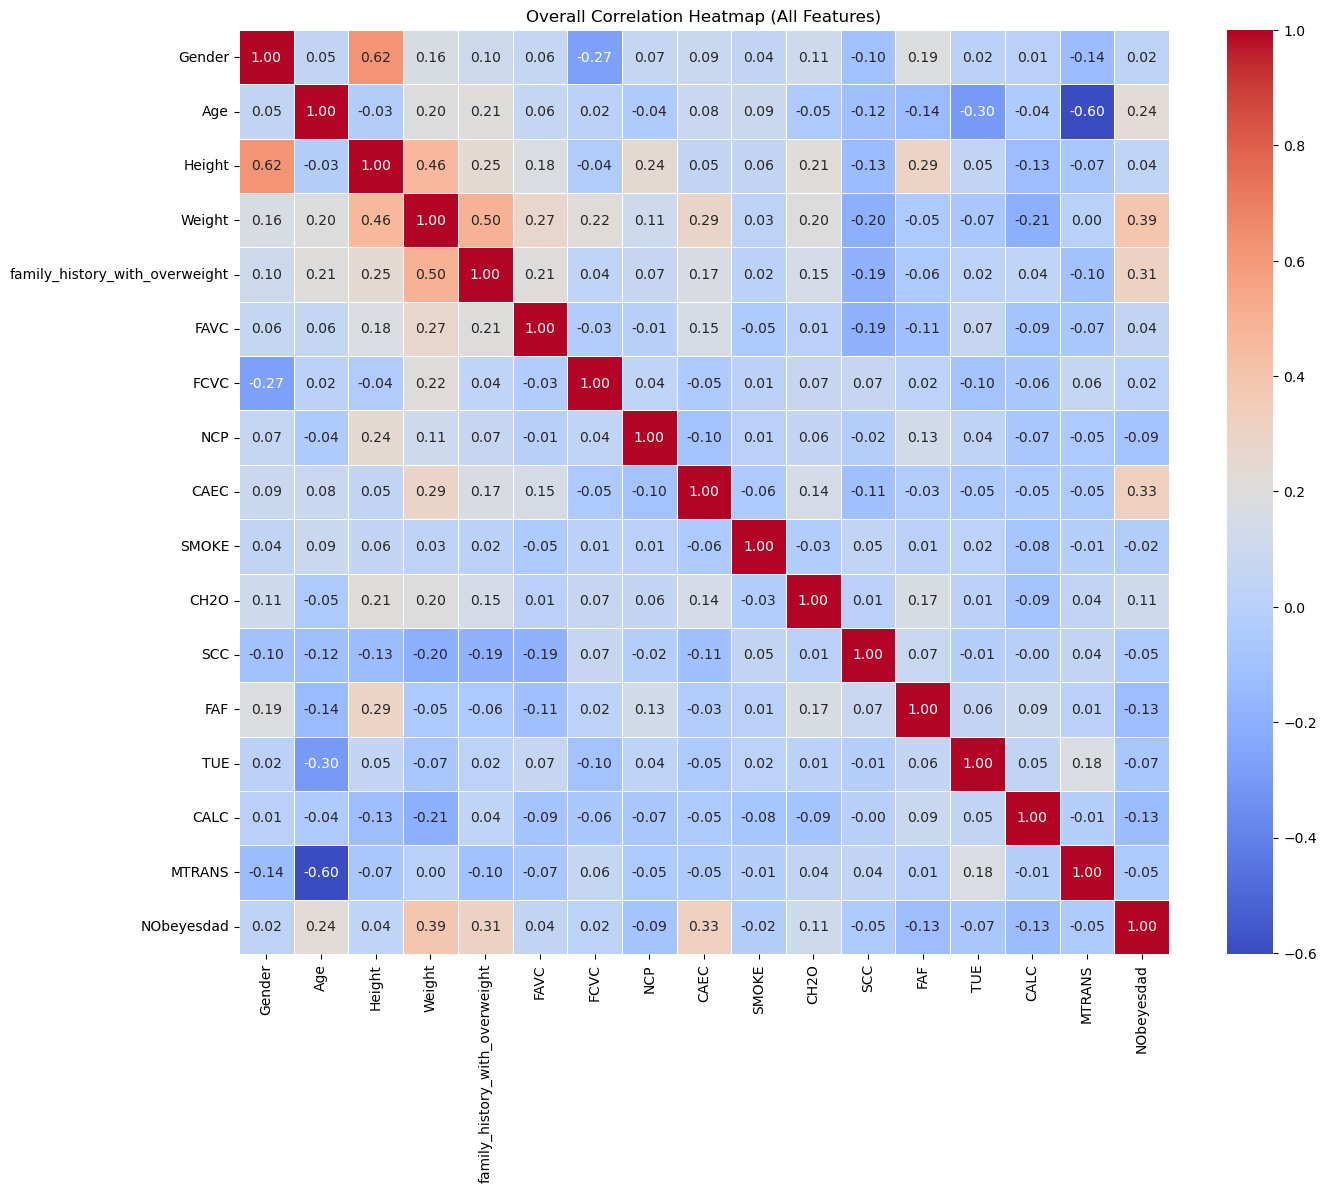

In [10]:
# ================================
# Additional Heatmap: Categorical Features vs Target
# ================================
 
# Encode categorical features to visualize relationships
from sklearn.preprocessing import LabelEncoder
encoded_df = df.copy()
 
# Encode categorical columns
for col in categorical_cols:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])
 
# Heatmap for categorical features and target variable
plt.figure(figsize=(10, 6))
sns.heatmap(
    encoded_df[categorical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("Correlation Heatmap (Categorical Features)")
plt.show()
 
# Heatmap for all features
plt.figure(figsize=(15, 12))
sns.heatmap(
    encoded_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5
)
plt.title("Overall Correlation Heatmap (All Features)")
plt.show()

# 8. Data Pre-processing

## 8.1 Encoding & Scaling

Steps:
1. Encode categorical features (OneHot/Label Encoding)
2. Scale numerical features (StandardScaler/MinMaxScaler)

⚙️ **Reason:** Many ML models require numerical input on a similar scale for optimal performance.


In [11]:
# Define the mapping for categorical columns
mapping = {
    'Gender': {'Male': 1, 'Female': 0},
    'family_history_with_overweight': {'yes': 1, 'no': 0},
    'FAVC': {'yes': 1, 'no': 0},
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'SMOKE': {'yes': 1, 'no': 0},
    'SCC': {'yes': 1, 'no': 0},
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'MTRANS': {'Walking': 0, 'Bike': 1, 'Motorbike': 2, 'Public_Transportation': 3, 'Automobile': 4},
    'NObeyesdad': {
        'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 
        'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 
        'Obesity_Type_III': 6
    }
}

# Apply the mapping to the categorical columns
for column, map_dict in mapping.items():
    df[column] = df[column].map(map_dict)

# Display the first few rows to verify the changes
df

Gender        Age    Height      Weight  family_history_with_overweight  \
0          0  21.000000  1.620000   64.000000                               1   
1          0  21.000000  1.520000   56.000000                               1   
2          1  23.000000  1.800000   77.000000                               1   
3          1  27.000000  1.800000   87.000000                               0   
4          1  22.000000  1.780000   89.800000                               0   
...      ...        ...       ...         ...                             ...   
2106       0  20.976842  1.710730  131.408528                               1   
2107       0  21.982942  1.748584  133.742943                               1   
2108       0  22.524036  1.752206  133.689352                               1   
2109       0  24.361936  1.739450  133.346641                               1   
2110       0  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0        0   2.0  3.0     1      0  2.000000    0  0.000000  1.000000     0   
1        0   3.0  3.0     1      1  3.000000    1  3.000000  0.000000     1   
2        0   2.0  3.0     1      0  2.000000    0  2.000000  1.000000     2   
3        0   3.0  3.0     1      0  2.000000    0  2.000000  0.000000     2   
4        0   2.0  1.0     1      0  2.000000    0  0.000000  0.000000     1   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     1      0  1.728139    0  1.676269  0.906247     1   
2107     1   3.0  3.0     1      0  2.005130    0  1.341390  0.599270     1   
2108     1   3.0  3.0     1      0  2.054193    0  1.414209  0.646288     1   
2109     1   3.0  3.0     1      0  2.852339    0  1.139107  0.586035     1   
2110     1   3.0  3.0     1      0  2.863513    0  1.026452  0.714137     1   

      MTRANS  NObeyesdad  
0          3           1  
1          3           1  
2          3           1  
3          0           2  
4          3           3  
...      ...         ...  
2106       3           6  
2107       3           6  
2108       3           6  
2109       3           6  
2110       3           6  

[2111 rows x 17 columns]

# 9. Model Building

## 9.1 Model Selection & Training

We test multiple classifiers:
- Logistic Regression
- Random Forest
- XGBoost
- Support Vector Machines (SVM)

**Metric Used:** Accuracy, Precision, Recall, F1-score

🎯 **Goal:** Choose the best-performing model.


## 9.2 Evaluation & Insights

- **Confusion Matrix:** Shows class-wise prediction performance
- **Classification Report:** Gives precision, recall, and F1-score

💡 **Insights Example:**
- Model struggles more with certain obesity categories
- Some features may dominate prediction power



In [17]:
import joblib
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline

In [18]:
# Data Preprocessing (Assumed step)
X = df.drop('NObeyesdad', axis=1) 
y = df['NObeyesdad']
 
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training Logistic Regression...
Training SVM...
Training Random Forest...
Training XGBoost...
Training AdaBoost...


C:\Users\40038389\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\40038389\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\40038389\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\40038389

Training CatBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 16
[LightGBM] [Info] Start training from score -2.056021
[LightGBM] [Info] Start training from score -2.015199
[LightGBM] [Info] Start training from score -1.975979
[LightGBM] [Info] Start training from score -1.950661
[LightGBM] [Info] Start training from score -1.821828
[LightGBM] [Info] Start training from score -1.954836
[LightGBM] [Info] Start training from score -1.866779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

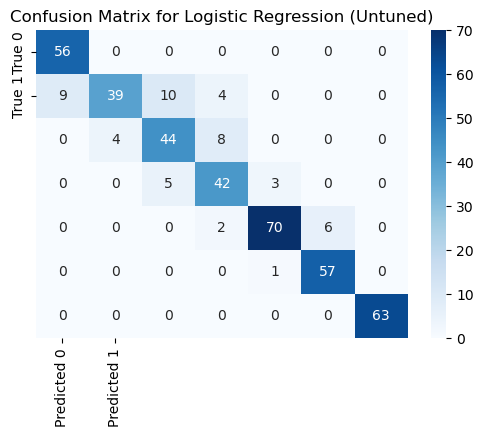

Classification Report for Logistic Regression (Untuned):
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        56
           1       0.91      0.63      0.74        62
           2       0.75      0.79      0.77        56
           3       0.75      0.84      0.79        50
           4       0.95      0.90      0.92        78
           5       0.90      0.98      0.94        58
           6       1.00      1.00      1.00        63

    accuracy                           0.88       423
   macro avg       0.87      0.88      0.87       423
weighted avg       0.88      0.88      0.87       423



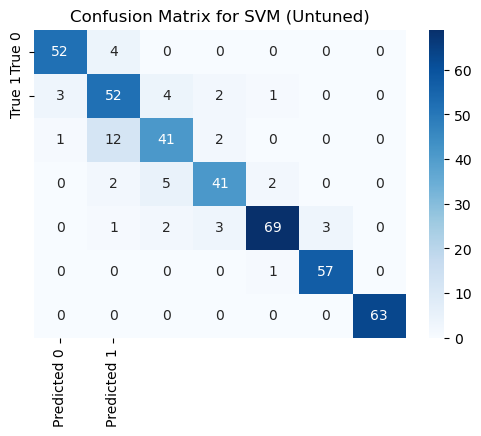

Classification Report for SVM (Untuned):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        56
           1       0.73      0.84      0.78        62
           2       0.79      0.73      0.76        56
           3       0.85      0.82      0.84        50
           4       0.95      0.88      0.91        78
           5       0.95      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.89       423
   macro avg       0.89      0.88      0.88       423
weighted avg       0.89      0.89      0.89       423



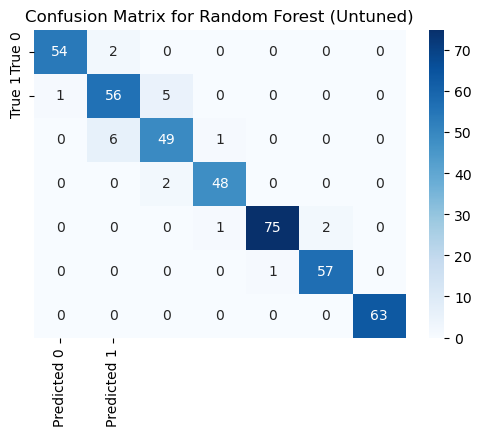

Classification Report for Random Forest (Untuned):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.88      0.90      0.89        62
           2       0.88      0.88      0.88        56
           3       0.96      0.96      0.96        50
           4       0.99      0.96      0.97        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423



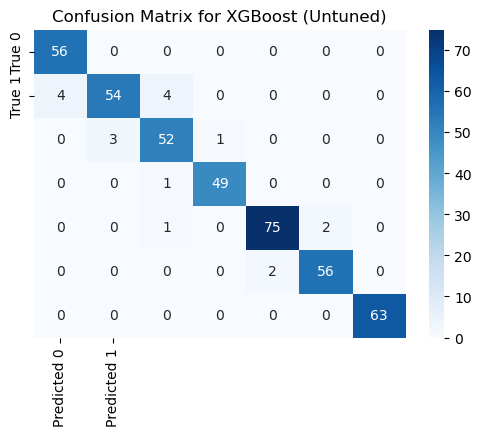

Classification Report for XGBoost (Untuned):
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       0.95      0.87      0.91        62
           2       0.90      0.93      0.91        56
           3       0.98      0.98      0.98        50
           4       0.97      0.96      0.97        78
           5       0.97      0.97      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



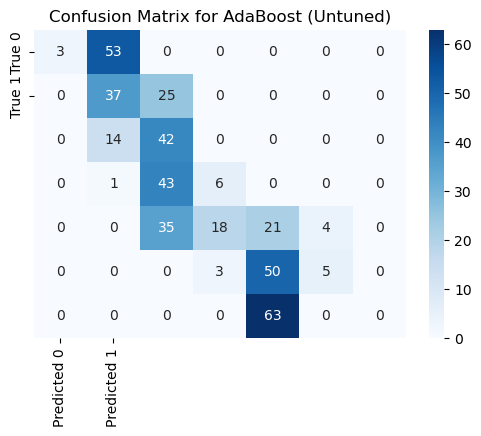

Classification Report for AdaBoost (Untuned):
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        56
           1       0.35      0.60      0.44        62
           2       0.29      0.75      0.42        56
           3       0.22      0.12      0.16        50
           4       0.16      0.27      0.20        78
           5       0.56      0.09      0.15        58
           6       0.00      0.00      0.00        63

    accuracy                           0.27       423
   macro avg       0.37      0.27      0.21       423
weighted avg       0.35      0.27      0.21       423



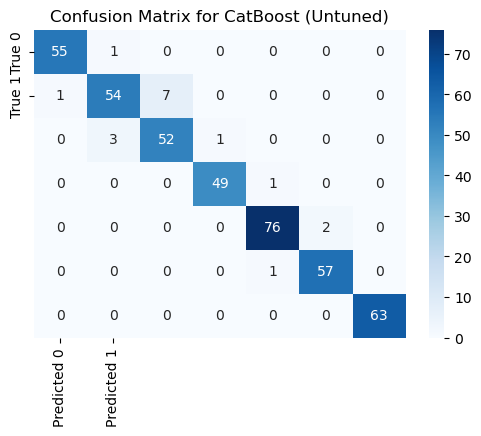

Classification Report for CatBoost (Untuned):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        56
           1       0.93      0.87      0.90        62
           2       0.88      0.93      0.90        56
           3       0.98      0.98      0.98        50
           4       0.97      0.97      0.97        78
           5       0.97      0.98      0.97        58
           6       1.00      1.00      1.00        63

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423



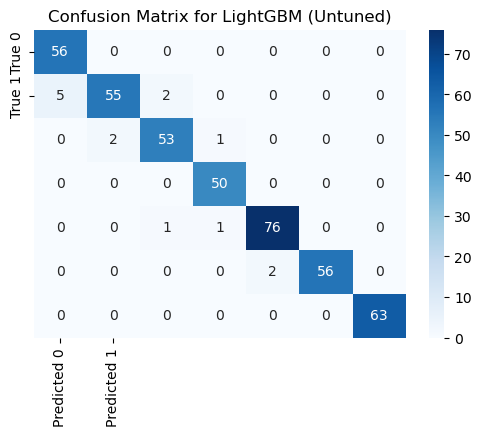

Classification Report for LightGBM (Untuned):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        56
           1       0.96      0.89      0.92        62
           2       0.95      0.95      0.95        56
           3       0.96      1.00      0.98        50
           4       0.97      0.97      0.97        78
           5       1.00      0.97      0.98        58
           6       1.00      1.00      1.00        63

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



In [20]:
# Step 5: Standardize the Features (important for SVM, Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the Models Without Hyperparameter Tuning
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'CatBoost': cb.CatBoostClassifier(silent=True),
    'LightGBM': lgb.LGBMClassifier()
}

# Step 7: Train and Evaluate Models Without Hyperparameter Tuning
results_untuned = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics using appropriate average setting for multiclass targets
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Store results
    results_untuned[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix
    }

# Step 8: Display Results for Untuned Models
results_untuned_df = pd.DataFrame(results_untuned).T
print("Results for Untuned Models:")
print(results_untuned_df)

# Step 9: Plot Confusion Matrices and Classification Reports for Untuned Models
for model_name, result in results_untuned.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {model_name} (Untuned)')
    plt.show()
    
    print(f"Classification Report for {model_name} (Untuned):")
    print(result['Classification Report'])

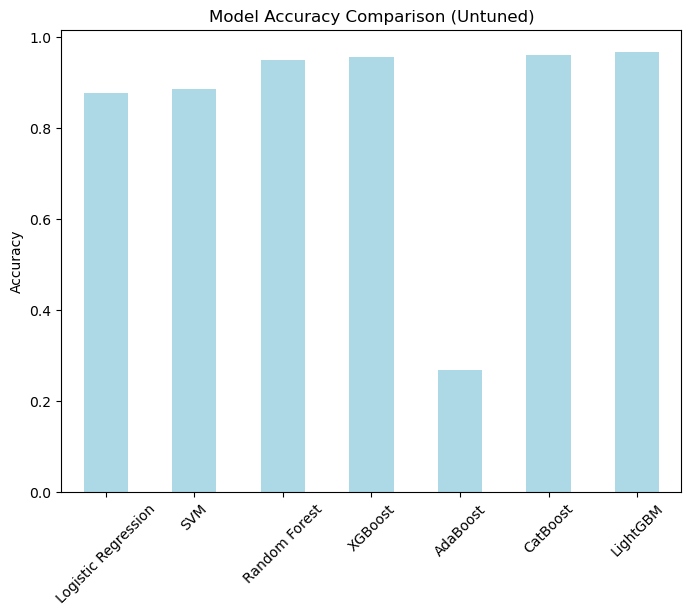

In [21]:
# Step 10: Plot Accuracy Comparison for Untuned Models
accuracies_untuned = results_untuned_df['Accuracy']
plt.figure(figsize=(8, 6))
accuracies_untuned.plot(kind='bar', color='lightblue')
plt.title('Model Accuracy Comparison (Untuned)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Step 11: Hyperparameter Grids for Tuning
param_grid_logreg = {'C': [0.1, 1, 10], 'penalty': ['l2'], 'solver': ['liblinear', 'saga']}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
param_grid_xgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]}
param_grid_ada = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}
param_grid_cat = {'iterations': [100, 200], 'learning_rate': [0.01, 0.1], 'depth': [3, 5, 7]}
param_grid_lgb = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7], 'num_leaves': [31, 50]}

# Hyperparameter grids for all models
param_grids = {
    'Logistic Regression': param_grid_logreg,
    'SVM': param_grid_svm,
    'Random Forest': param_grid_rf,
    'XGBoost': param_grid_xgb,
    'AdaBoost': param_grid_ada,
    'CatBoost': param_grid_cat,
    'LightGBM': param_grid_lgb
}

# Step 12: Hyperparameter Tuning with GridSearchCV
results_tuned = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Apply GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    # Best model and metrics
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred_tuned)
    precision = precision_score(y_test, y_pred_tuned, average='weighted')
    recall = recall_score(y_test, y_pred_tuned, average='weighted')
    f1 = f1_score(y_test, y_pred_tuned, average='weighted')
    class_report = classification_report(y_test, y_pred_tuned)
    conf_matrix = confusion_matrix(y_test, y_pred_tuned)
    
    # Store results
    results_tuned[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Best Params': grid_search.best_params_,
        'Classification Report': class_report,
        'Confusion Matrix': conf_matrix
    }

# Step 13: Display Results for Tuned Models
results_tuned_df = pd.DataFrame(results_tuned).T
print("Results for Tuned Models:")
print(results_tuned_df)

# Step 14: Plot Confusion Matrices and Classification Reports for Tuned Models
for model_name, result in results_tuned.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(result['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix for {model_name} (Tuned)')
    plt.show()
    print(f"Classification Report for {model_name} (Tuned):")
    print(result['Classification Report'])

# Step 15: Plot Accuracy Comparison for Tuned Models
accuracies_tuned = results_tuned_df['Accuracy']
plt.figure(figsize=(8, 6))
accuracies_tuned.plot(kind='bar', color='lightgreen')
plt.title('Model Accuracy Comparison (Tuned)')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

# 10. Key Insights

# 📌 Final Insights & Observations
1. Lifestyle habits (caloric intake, physical activity) strongly influence obesity classification
2. Certain categories are more challenging to predict — may require more data or feature engineering
3. Random Forest/XGBoost may outperform linear models due to non-linear relationships in data
